## Python statistics essential training - 03_07_proportions

Standard imports

In [14]:
import numpy as np
import scipy.stats
import pandas as pd

In [15]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [16]:
import re
import mailbox
import csv

In [17]:
smoking = pd.read_csv('whickham.csv')

In [18]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [19]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [20]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [21]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [22]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'Smoker')

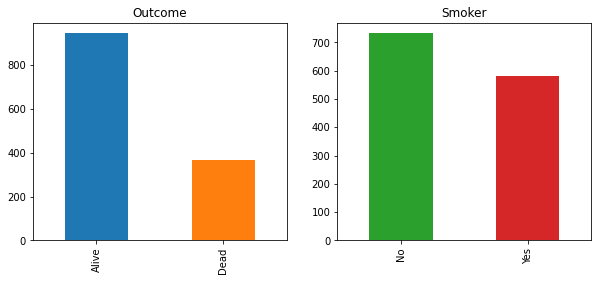

In [25]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1);smoking.outcome.value_counts().plot(kind='bar', color=['C0','C1']);pp.title('Outcome')
pp.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='bar',color=['C2','C3']);pp.title('Smoker')

<AxesSubplot:xlabel='smoker,outcome'>

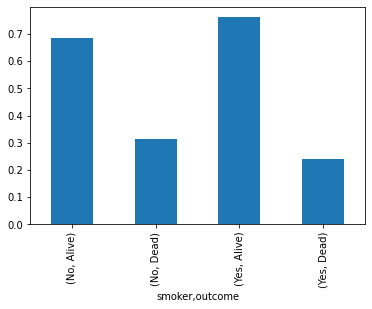

In [26]:
bysmoker.plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

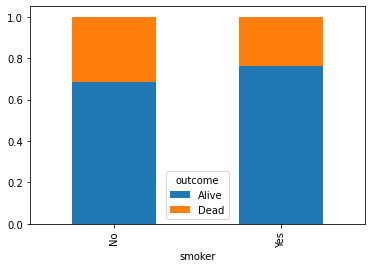

In [27]:
bysmoker.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='ageGroup,smoker'>

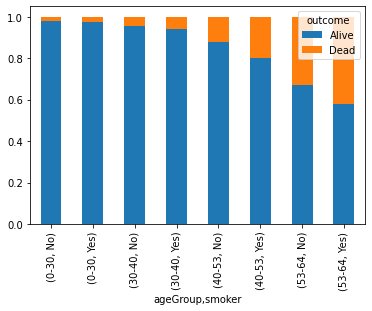

In [28]:
byage.unstack().plot(kind='bar', stacked=True)

In [31]:
byage.unstack().drop('Dead', axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [32]:
byage2 = byage.unstack().drop('Dead', axis=1).unstack()
byage2.columns = ['Yes','No']
byage2.columns.name = 'smoker'

In [33]:
byage2

smoker,Yes,No
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


<AxesSubplot:xlabel='ageGroup'>

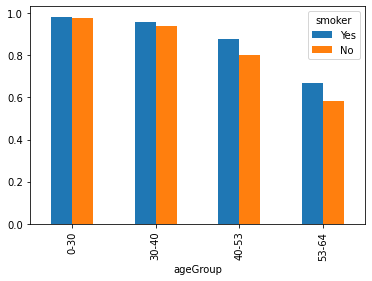

In [34]:
# simpson paradox illustration
byage2.plot(kind='bar')